# MNIST Classification using Neural Networks

In [1]:
import numpy as np
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
import backend  # Neural network implementation
import utilities  # For ploting and data import

## Feed Forward Neural Network

### Model

(input $\rightarrow$ fully connected + Relu (32) $\rightarrow$ fuly connected $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

num_epochs=4, learning_rate=0.001

In [2]:
# set hyperparameters
num_epochs = 4
learning_rate = 0.001
batch_size = 100


Achieved Prediction Accuracy:  0.945 %


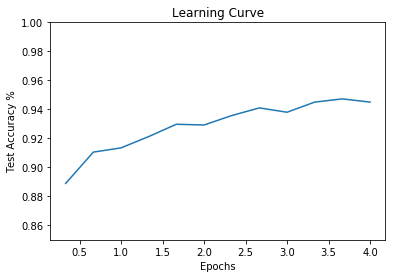

In [3]:
mnist = utilities.MNIST()

# define model
mymodel = backend.Model(784, "linear", "relu")

# initialize and set params
count, test_accuracy = 0, []
log_freq = 200

# progress bar
pbar = tqdm(total=60000*num_epochs/batch_size+1)

while mnist.epochs_completed < num_epochs:
    # update counts
    pbar.update(1)
    count += 1
    batch_xs, batch_ys = mnist.next_batch(batch_size)

    # train using a batch
    mymodel.train(learning_rate, batch_xs, batch_ys)

    # periodically evaluate
    if count % log_freq == 0:
        # evaluate with the complete test set
        batch_xs, batch_ys = mnist.test_batch()
        val = mymodel.evaluate(batch_xs, batch_ys)
        test_accuracy.append(val)
        
pbar.close()
# print the result
utilities.summarize_result(test_accuracy)

## Convolutional Neural Network

### Model

(input(28x28) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ conv(3x3x8) + maxpool(2x2) $\rightarrow$ flatten $\rightarrow$ fully connected + Relu (32) $\rightarrow$ fully connected $\rightarrow$ softmax $\rightarrow$ class probabilities)

### Hyper-parameters

num_epochs=4, learning_rate=0.001

In [4]:
# set hyperparameters
num_epochs = 4
learning_rate = 0.001
batch_size = 100


Achieved Prediction Accuracy:  0.9797 %


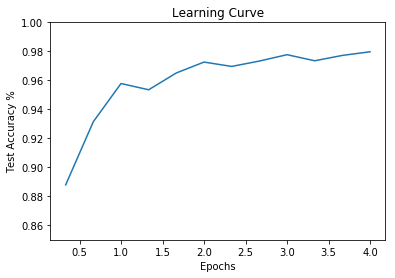

In [5]:
mnist = utilities.MNIST()

# define model
mymodel = backend.Model([28, 28, 1], "conv", "maxpool", "conv", "maxpool",
                  "flatten", "linear", "relu", "linear", "relu")

# initialize and set params
count, test_accuracy = 0, []
log_freq = 200

# progress bar
pbar = tqdm(total=60000*num_epochs/batch_size+1)

while mnist.epochs_completed < num_epochs:
    # update counts
    pbar.update(1)
    count += 1
    batch_xs, batch_ys = mnist.next_batch(batch_size)
    batch_xs = np.reshape(batch_xs, [-1, 28, 28, 1])

    # train using a batch
    mymodel.train(learning_rate, batch_xs, batch_ys)

    # periodically evaluate
    if count % log_freq == 0:
        # evaluate with the complete test set
        batch_xs, batch_ys = mnist.test_batch()
        batch_xs = np.reshape(batch_xs, [-1, 28, 28, 1])
        val = mymodel.evaluate(batch_xs, batch_ys)
        test_accuracy.append(val)

pbar.close()
# print the result
utilities.summarize_result(test_accuracy)